<a href="https://colab.research.google.com/github/shesfromasgard/titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Suvivor Prediction

The objective of this notebook is to follow a step-by-step workflow, guiding the data scientist into the rationale for every decision.

**Workflow stages**

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.




## 1. Question and problem definition


```
Adicione aqui uma descrição do problema que vamos solucionar.
```



## 2. Acquire training and testing data


```
Esta seção é responsável por ler os dados de treino e teste.

Adicioine aqui uma explicação sobre a diferença entre dados de treino e teste justificando sua necessidade/importancia em Machine Learning.
```



### Imports

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

### Read Data

In [ ]:
# Read data from .csv and convert it to a Pandas DataFrame
df_train = pd.read_csv('/content/sample_data/train.csv')
df_test  = pd.read_csv('/content/sample_data/test.csv')

combine = [df_train, df_test]

In [ ]:
# preview the data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analyze by describing data

In [ ]:
# Which features are available in the dataset?
print(df_train.columns.values)

# Resp.:
# Existem 12 features nos dados disponibilizados.
# PassengerId:
# Survived: 0 ou 1. Caso o valor seja 1, o passageiro sobreviveu, zero o contrario.
# Pclass:
# Name:
# Sex:
# Age
# SibSp: Número de irmãos/cônjuges a bordo do Titanic
# Parch: Número de pais/filhos a bordo do Titanic
# Ticket:
# Fare:
# Cabin:
# Embarked: Porto de embarque C = Cherbourg, Q = Queenstown, S = Southampton

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
# Which features are categorical?


# Which features are numerical?


# Which features are mixed data types? (Alphanumeric for example)
# Resp.: Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.


# Which features may contain errors or typos? (erro de digitação)
print("------------ Análise de Erros de Digitação -------------")
print(df_train.Name.value_counts())
# Resp.: O recurso de nome pode conter erros ou erros de digitação,
# pois há várias maneiras de descrever um nome,
# incluindo títulos, colchetes e aspas usadas para nomes alternativos ou abreviados.


# Which features contain blank, null or empty values?


# What are the data types for various features?
print("------------ types -------------")
print(df_train.info())
# Resp.: float64(2), int64(5), object(5)
# PassengerId: int
# Survived:
# Pclass:
# ...


# What is the distribution of numerical feature values across the samples?
print("------------ distribution numerical features -------------")
print(df_train.describe())

# Resp.:
# PassengerId: é um contador unico incremental iniciando em 1 indo até 891 nos dados de treino.
# Survived: é uma features categórica com valores 0 ou 1.
# Pclass:
# Age:
# SibSp:
# Parch:
# Fare:

# What is the distribution of categorical features?
print("------------ distribution categorical features -------------")
print(df_train.describe(include=['O']))
# Resp.:
# Names: Os nomes são unicos uma vez que temos 891 nomes distintos e 891 dados no grupo de traino.
# Sex:
# Ticket:
# Cabin:
# Embarked:

------------ Análise de Erros de Digitação -------------
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
------------ types -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4 

### Analyze by pivoting features

In [ ]:
# What was the survivor rate by Pclass?
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Resp.:
# Passageiros de classes superiores possuem maiores indices de sobrevivencia.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
# What was the survivor rate by Sex?
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


In [ ]:
# What was the survivor rate by SibSp?



In [ ]:
# What was the survivor rate by Parch?


### Analyze by visualizing data


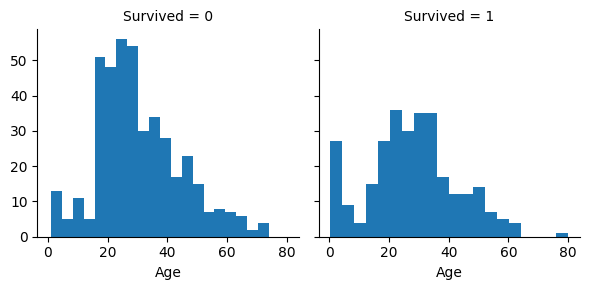

In [ ]:
# What was the survivor rate by Age?
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# Questions
# Como é o surviver rate de crianças até 4 anos (Age <=4)?
# Como é o surviver rate de idosos acima de 80 anos?
# Como voce descreve o survivor rate de pessoas entre 15 e 25 anos?
# Qual o intervalo de idade onde se concentra a maior parte dos dados?

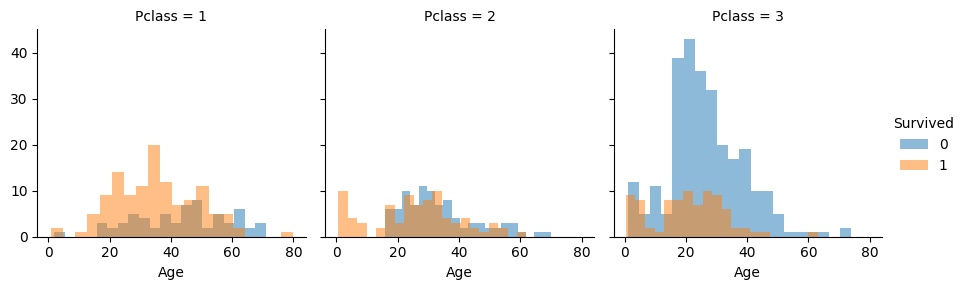

In [ ]:
# Comparing Pcass with Age and classify by survivor
grid = sns.FacetGrid(df_train, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Existe alguma concentração de pessoas em alguma classe? qual?
# Existe alguma classe que apresentou maior relação de sobreviventes?
# Passageiros crianças possuem taxas de sobrevivencia diferentes nas classes?
# Alguma outra observação relevante identificada?

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


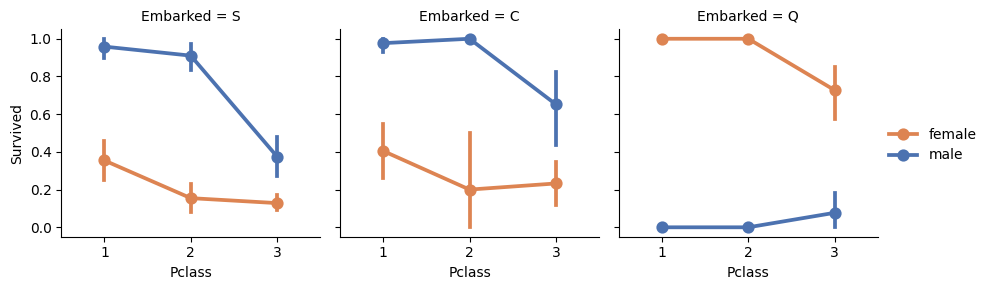

In [ ]:
# Comparing survivers correlation with sex
grid = sns.FacetGrid(df_train, col='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# Existe diferença entre homem e mulher na taxa de sobrevivencia?
# Existe diferença entre homem e mulher na taxa de sobrevivencia por classe?
# Alguma outra observação relevante?

In [ ]:
# Comparing survivers correlation with embarkation




## 3.Wrangle, prepare, cleanse the data

In [ ]:
# Droping Features

# Remover as features Ticket, Cabin, Name e Id do dataframe uma vez que essas não sao informações relevantes para sobrevivencia.
df_train = df_train.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
df_test = df_test.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
combine = [df_train, df_test]

In [ ]:
# Converting a categorical feature Sex to numerical
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [ ]:
# Check Nan and Null Values
print(df_train.isnull().sum())
print()
print(df_test.isnull().sum())

# Drop rows with Nan Values
df_train = df_train.dropna()
df_test = df_test.dropna()

# Check Nan and Null Values again
print(df_train.isnull().sum())
print()
print(df_test.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### Create new feature combining existing features

In [ ]:
# Creating a new feature Family Size

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
combine = [df_train, df_test]

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Familias maiores possuem alguma correlação com a taxa de sobrevivencia?


<ipython-input-17-9d568a52e526>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
<ipython-input-17-9d568a52e526>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1


,FamilySize,Survived
3,4,0.777778
2,3,0.569892
1,2,0.546763
6,7,0.333333
0,1,0.318408
4,5,0.272727
5,6,0.136364
7,8,0.000000


In [ ]:
# Crie uma nova feature is_alone, onde representa se o passageiro esta sozinho 1 ou não 0.



### Converting categorical feature to numeric



In [ ]:
# Convert Embared feature into a numerical
df_train = pd.get_dummies(df_train, columns=["Embarked"])
df_test = pd.get_dummies(df_test, columns=["Embarked"])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,2,False,False,True
1,1,1,1,38.0,1,0,71.2833,2,True,False,False
2,1,3,1,26.0,0,0,7.9250,1,False,False,True
3,1,1,1,35.0,1,0,53.1000,2,False,False,True
4,0,3,0,35.0,0,0,8.0500,1,False,False,True


# Model, predict and solve

In [ ]:
# Separatig the data into x and y
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Train Data
# X_train = df_train.drop("Survived", axis=1)
# Y_train = df_train["Survived"]

# # Test Data
# X_test  = df_test.copy()
# y_test  = df_test["Survived"]

# # Print lenght
# X_train.shape, Y_train.shape, X_test.shape

In [ ]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


80.32

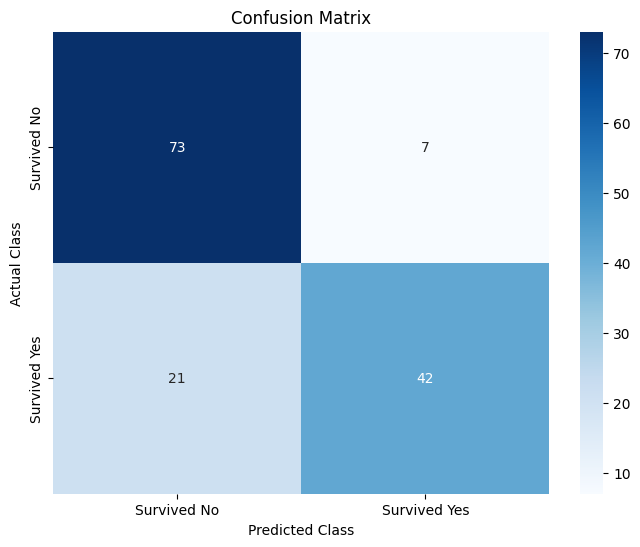

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Survived No', 'Survived Yes'], yticklabels=['Survived No','Survived Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
# Explique a diferença entre os 4 quadrantes da matrix de confusão

In [ ]:
# Calculate the Accuracy (TP + TN) / (TP + TN + FP + FN)
TP = conf_matrix[0][0]
TN = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
acc_log = (TP+TN) / (TP+TN+FP+FN)
acc_log

0.8041958041958042

In [ ]:
# Explique o significado do acc_log

In [ ]:
# Implemente outros modelos e obtenha um resultado melhor que o LogisticRegression